In [19]:
import csv
import numpy as np
import keras
import datetime

print("%s start" % datetime.datetime.today())
###
# 1.データ準備
###
print("initializing...")
n = 8500              # 入力層の要素数(=データの最大文字数)
k = 3                 # 出力層の要素数(いくつに分類するか)

max_rows = 10000  # 読み取り行数最大
train_ratio = 0.9 # 読み取ったデータのうち学習に使う比率
train_rows = int(max_rows * train_ratio) # 学習に使うデータの行数
test_rows = max_rows - train_rows
print("max_rows=%s" % max_rows)
print("train_rows=%s" % train_rows)

print("reading data..")
# numpy.appendは遅いので先にlistに取り込んでからnumpyに展開
xlist=[]
ylist=[]
with open('reviews-ccnn-train-data04.txt', 'r') as f:
    reader = csv.reader(f,delimiter = '\t')
#    header = next(reader)  # ヘッダーを読み飛ばしたい時

    for i,row in enumerate(reader):
        if i >= max_rows:
            break
#        print(i,row[0],row[1])          # 1行づつ取得できる
        if (i+1) % 10000 == 0:
            print("%s rows read .. %s" % (i+1,datetime.datetime.today()))
        x=[]
        for c in row[1]:
            x.append(float(np.int.from_bytes(c.encode('utf-8'),'big')))
        xx = np.array(x)
        xx.resize(n,refcheck=False)
        xx = xx.astype('float32')
        y = float(row[0])
        xlist.append(xx)
        ylist.append(y)

print("total %s rows read" % (i) )

X=np.zeros((len(xlist),n),float) # 学習用入力データの行列
Y=np.zeros((len(ylist),k),float)  # 学習用出力データの行列
X_test=np.zeros((len(xlist),n),float) # 評価用入力データの行列
Y_test=np.zeros((len(ylist),k),float) # 評価用出力データの行列
train_index = 0
test_index = 0
for i in range(len(xlist)):
    x = xlist[i]
    y = ylist[i]
#    n_sub_samples = len(x.shape[0]
    # 上位train_rows分を学習データ　それ以外を評価データに使う
    # ホントはシャッフルしたほうがいい
    if i < train_rows:
        X[i:i+1,:] = x
        Y[i:i+1,:] = keras.utils.np_utils.to_categorical(y, k)
    else:
        X_test[i-train_rows:i-train_rows+1,:] = x
        Y_test[i-train_rows:i-train_rows+1,:] = keras.utils.np_utils.to_categorical(y, k)

X.resize((train_rows,n))
Y.resize((train_rows,k))
X_test.resize((test_rows,n))
Y_test.resize((test_rows,k))

# Xを３次元の行列に変換。この意味はわからない・・Kerasの都合か。
X=X.reshape(X.shape[0],n,1)
X_test=X_test.reshape(X_test.shape[0],n,1)
# 正規化
X /= 0x1FFFFF
X_test /= 0x1FFFFF

print("%s initialized" % datetime.datetime.today())



2018-02-15 00:51:35.336288 start
initializing...
max_rows=10000
train_rows=9000
reading data..
10000 rows read .. 2018-02-15 00:51:42.520808
total 10000 rows read
2018-02-15 00:51:43.322484 initialized


In [20]:
# 学習データの件数確認
X_test.shape


(1000, 8500, 1)

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adadelta
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.layers.core import Dropout
from keras.initializers import TruncatedNormal
from keras.layers import Flatten, Conv1D, MaxPooling1D

###
# 2.モデル設定
###
print("%s building model start" % datetime.datetime.today())
kernel_size = (3)
model = Sequential()
# 入力層
model.add(Conv1D(32, kernel_size=kernel_size,
                 activation='relu',
                 input_shape=(n,1)
                 )
        )
# 畳み込み層
model.add(Conv1D(64, kernel_size, activation='relu'))
# プーリング層
model.add(MaxPooling1D(pool_size=(2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
# 出力層
model.add(Dense(k, activation='softmax'))

# 確率的勾配降下法
model.compile(loss='categorical_crossentropy', optimizer=Adadelta(), metrics=['accuracy'])

print("%s model built" % datetime.datetime.today())


building model start at 2018-02-14 23:25:29.713694
model built at 2018-02-14 23:25:29.999461


In [5]:
print("%s trainning model start" % datetime.datetime.today())

###
# 3.モデル学習
###
epochs = 12     # 学習繰り返し数
batch_size = 120
hist = model.fit(X, Y, epochs=epochs, batch_size=batch_size,)
#               validation_data=(X_validation ,Y_validation))

print("%s training finish" % datetime.datetime.today())


learning model start at 2018-02-14 23:25:39.641035
Epoch 1/12
9000/9000 [==============================] - 332s - loss: 0.9809 - acc: 0.5532   
Epoch 2/12
9000/9000 [==============================] - 327s - loss: 0.7362 - acc: 0.5698   
Epoch 3/12
9000/9000 [==============================] - 328s - loss: 0.7306 - acc: 0.5759   
Epoch 4/12
9000/9000 [==============================] - 326s - loss: 0.7184 - acc: 0.5790   
Epoch 5/12
9000/9000 [==============================] - 325s - loss: 0.7138 - acc: 0.5810   
Epoch 6/12
9000/9000 [==============================] - 325s - loss: 0.7040 - acc: 0.5927   
Epoch 7/12
9000/9000 [==============================] - 328s - loss: 0.6885 - acc: 0.6112   
Epoch 8/12
9000/9000 [==============================] - 331s - loss: 0.6700 - acc: 0.6274   
Epoch 9/12
9000/9000 [==============================] - 342s - loss: 0.6478 - acc: 0.6517   
Epoch 10/12
9000/9000 [==============================] - 369s - loss: 0.6175 - acc: 0.6767   
Epoch 11/12
9000/9

In [22]:
###
# 4-1.評価
###
print("%s evaluate start" % datetime.datetime.today())
loss_and_metrics = model.evaluate(X_test, Y_test)
print()
print(loss_and_metrics)
# 可視化
val_loss = hist.history['loss']
val_acc = hist.history['acc']
print(val_loss)
print(val_acc)

print("%s evaluate finish" % datetime.datetime.today())


2018-02-15 00:52:49.191995 evaluate start
1000/1000 [==============================] - 10s    

[0.82522573566436763, 0.51600000000000001]
[0.98090441862742106, 0.73621815601984664, 0.73058515151341752, 0.71840133110682169, 0.71384462674458826, 0.70395606040954595, 0.68852680683135992, 0.66996780633926389, 0.64783008654912311, 0.61747752745946249, 0.58122654994328815, 0.53824241439501441]
[0.55322221994400023, 0.56977777640024818, 0.57588888724644982, 0.57900000055631007, 0.58099999547004699, 0.59266666611035668, 0.61122222503026324, 0.62744444608688354, 0.65166666507720949, 0.67666666348775228, 0.7105555589993795, 0.73833333174387616]
2018-02-15 00:52:59.717492 evaluate finish


In [23]:
###
# 4-2.予測
###

predicted = model.predict(X_test)


In [24]:
# ランダムに１０個ほど予測結果を確認
for i in np.random.randint(0,max_rows-train_rows,10):
    print(i,Y_test[i],predicted[i])
    # ID化したデータを文字列に戻す
    ss = str()
    for xx in (X_test[i] * 0x1FFFFF).reshape(n).astype(int):
        ixx = int(xx)
        ss += (ixx.to_bytes((ixx.bit_length() + 7) // 8,'big')).decode(encoding='utf-8')

    print(ss)




460 [ 0.  1.  0.] [ 0.00295908  0.517681    0.47935981]
ナビを頼りに店頭にたどりつくとあれ？目的の店の名前が違います。 とりあえず入ってみると、やはり別の店でしたｗ（目的のお店は同じビルのB1でした） なかは結構繁盛していてほぼ満席。 いろいろメニューがありましたが、海老もあったでこちらを 程なくして提供。海老の香りがブワッと広がります。 早速ズバズバ、モチモチの麺がｳﾏｰ。チャーシューは炙られていて香ばしさUP スープはエビがガツンと前に出ていてGOOD! ただザラザラした食感がちと気になりましたね。海老がこせてないのかな。
24 [ 0.  1.  0.] [ 0.01848684  0.60881102  0.37270215]
何処で食べても、同じ味 たまーに食べたくなるなる
156 [ 0.  0.  1.] [ 0.00438532  0.50057077  0.49504384]
かなり久しぶりの訪問。 引っ越してから、来る機会もなく実家に戻った際に、食べたくなって行ってきました。  到着時、待ち人はおらずカウンターに少し空きがあっただけ。 相変わらずの人気です。  早々に着席し注文。着丼までに約１５分。  スープは毎度のことながら、抜群のドロドロ感。 麺に非常にからみやすく、あっという間においしく頂きました。 残った付け汁は、スープ割してもらい完飲。  味についての感想ですが、いつも思うのはちょっと塩辛いかもってことです(笑) これは完全に個人の好みなの問題なので仕方ないですが・・・ でも、おいしいことにかわりなしです。
787 [ 0.  1.  0.] [  1.76017027e-04   7.79734254e-01   2.20089674e-01]
海苔･ネギ･チャーシューなどシンプルな具材のビジュアルです。 スープは鶏ガラベースの動物系に野菜などを加えたあっさり系。 そこに昆布や節系などを使った醤油ダレを加えているそうです。 あっさり寄りで悪くは無いのですが方向性が見えて来ないと言うか バランスがイマイチで美味くも不味くもないそんな印象です。 麺は小林製麺さんの中太寄りの縮れのシンプルな札幌麺です。 茹で具合は良くて札幌麺らしくて良い印象ですがスープが あまり札幌系らしくないせいか

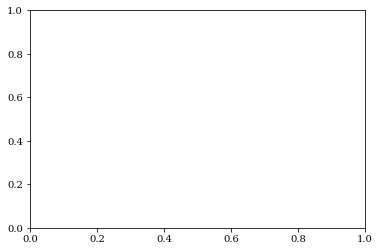

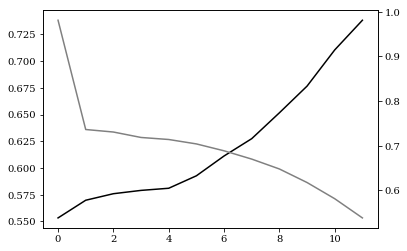

In [25]:
import os

###
# 5.学習の可視化
###

plt.rc('font', family='serif')
fig = plt.figure()
# 精度
ax_acc = fig.add_subplot(111)
ax_acc.plot(range(epochs), val_acc, label='acc', color='black')
# 損失
ax_loss = ax_acc.twinx()
ax_loss.plot(range(epochs), val_loss, label='loss', color='gray')
plt.xlabel('epochs')
#file,ext = os.path.splitext(os.path.basename(__file__))
#plt.savefig(file+'.eps')

plt.show()